### Lab 7: Higgs Classification

In [1]:
import pickle
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams["figure.figsize"] = (20,15)

# open the file of interest, and use pickle loading
infile = open ("lab5/qcd_100000_pt_250_500.pkl",'rb') # signal dataset
qcd = pickle.load(infile)
infile = open ("lab5/higgs_100000_pt_250_500.pkl",'rb') # background dataset
higgs = pickle.load(infile)

# list all keys of the files
print(qcd.keys())
print(higgs.keys())

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


## 1) Make a stacked histogram plot for the feature variable: mass

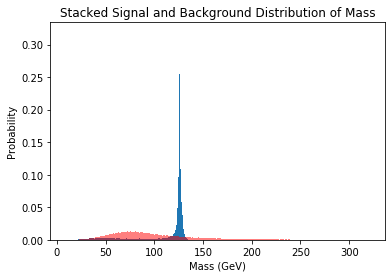

In [2]:
plt.hist(higgs['mass'], 500, density=True)
plt.hist(qcd['mass'], 500, color='red', alpha=.5, density=True)
plt.title('Stacked Signal and Background Distribution of Mass')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()

# a. Evaluate expected significance without any event selection

In [3]:
lenMass = len(qcd['mass'])
meanBG = np.mean(qcd['mass'])
prob = stats.poisson.cdf(125, meanBG) # x signal is eyeballed to 125
sigma = stats.norm.ppf(prob)
print('The signal of 125 is ', sigma, '\N{greek small letter sigma}')

lenSigMass = len(higgs['mass'])
NBG = 20000
NSig = 100
value = NSig / math.sqrt(NBG)
print('length of signal / square root of length of background = ', value)

The signal of 125 is  2.70499414329355 σ
length of signal / square root of length of background =  0.7071067811865475


The significance values and this calculated ratio are off by a about 2$\sigma$

## 2) Identify mass cuts to optimize the expected significance.

# a. Try different mass cuts systematically

normalize to 1 and then multiply by N(200000, 100) and then cut off and left and right of signal.

92.29381109781497
6378.509854716229


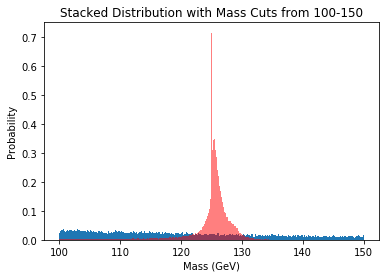

90.31262404434749
3800.3339695553314


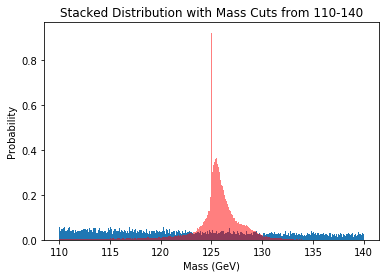

83.00890954720091
1250.8184396010806


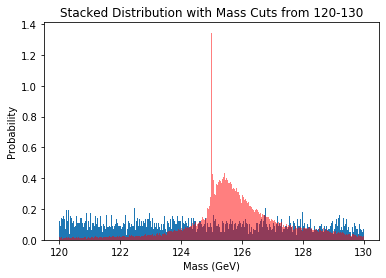

In [5]:
total = sum(qcd['mass'])
totalSig = sum(higgs['mass'])
newArr1 = []
newSig1 = []
for i in range(len(qcd['mass'])):
    if(qcd['mass'][i] < 150 and qcd['mass'][i] > 100):
        newArr1.append(qcd['mass'][i])
    if(higgs['mass'][i] < 150 and higgs['mass'][i] > 100):
        newSig1.append(higgs['mass'][i])

newNorm = []
for x in newArr1:
    newNorm.append(x / total)
newNorm = newNorm * 20000

newNormSig = []
for x in newSig1:
    newNormSig.append(x / totalSig)
newNormSig = newNormSig * 100

print(sum(newNormSig))
print(sum(newNorm))

bg1 = newNorm
sig1 = newNormSig

plt.hist(newArr1, 500, density=True)
plt.hist(newSig1, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 100-150')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()



total = sum(qcd['mass'])
totalSig = sum(higgs['mass'])
newArr1 = []
newSig1 = []
for i in range(len(qcd['mass'])):
    if(qcd['mass'][i] < 140 and qcd['mass'][i] > 110):
        newArr1.append(qcd['mass'][i])
    if(higgs['mass'][i] < 140 and higgs['mass'][i] > 110):
        newSig1.append(higgs['mass'][i])

newNorm = []
for x in newArr1:
    newNorm.append(x / total)
newNorm = newNorm * 20000

newNormSig = []
for x in newSig1:
    newNormSig.append(x / totalSig)
newNormSig = newNormSig * 100

print(sum(newNormSig))
print(sum(newNorm))

bg2 = newNorm
sig2 = newNormSig

plt.hist(newArr1, 500, density=True)
plt.hist(newSig1, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 110-140')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()



total = sum(qcd['mass'])
totalSig = sum(higgs['mass'])
newArr1 = []
newSig1 = []
for i in range(len(qcd['mass'])):
    if(qcd['mass'][i] < 130 and qcd['mass'][i] > 120):
        newArr1.append(qcd['mass'][i])
    if(higgs['mass'][i] < 130 and higgs['mass'][i] > 120):
        newSig1.append(higgs['mass'][i])

newNorm = []
for x in newArr1:
    newNorm.append(x / total)
newNorm = newNorm * 20000

newNormSig = []
for x in newSig1:
    newNormSig.append(x / totalSig)
newNormSig = newNormSig * 100

print(sum(newNormSig))
print(sum(newNorm))

bg3 = newNorm
sig3 = newNormSig

plt.hist(newArr1, 500, density=True)
plt.hist(newSig1, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()

# b. Evaluate expected significance for each set of mass cuts

# c. Identify the set of the mass cuts which give you the highest significance.

## 3) Make stacked histogram plots for the reset of features

# a. Set A of plots without any event selection

# b. Set B of plots with your optimal mass cuts

## 4) Optimize event selections using multiple features (if necessary

# a. Find a set of feature cuts which can help you to achieve the best significance.

# b. Compare significance (before/after event selection) dervied in your pT samples to your lab partner. Describe your findings.

## 5) Bonus

# a. Plot 2-dimensional scattering plots between top two most discriminative features